# GlaThiDa Statistics

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import geopandas as gpd
import numpy as np
import glob
from IPython.display import Markdown, display
import cartopy.crs as ccrs

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
gdf = gpd.read_file(r'~\thickness_region.shp')
gdf.columns

Index(['GlaThiDa_I', 'POLITICAL_', 'GLACIER_NA', 'SURVEY_DAT', 'POINT_ID',
       'ELEVATION', 'THICKNESS', 'THICKNESS_', 'DATA_FLAG', 'REMARKS',
       'REGION_COD', 'FULL_NAME', 'RGI_CODE', 'RGIId', 'geometry'],
      dtype='object')

In [4]:
pts = gdf['RGIId'].value_counts()
n_glaciers = pts.count()
printmd('#### Number of Glaciers with GlaThiDa Measurments: {}'.format(n_glaciers))

#### Number of Glaciers with GlaThiDa Measurments: 771

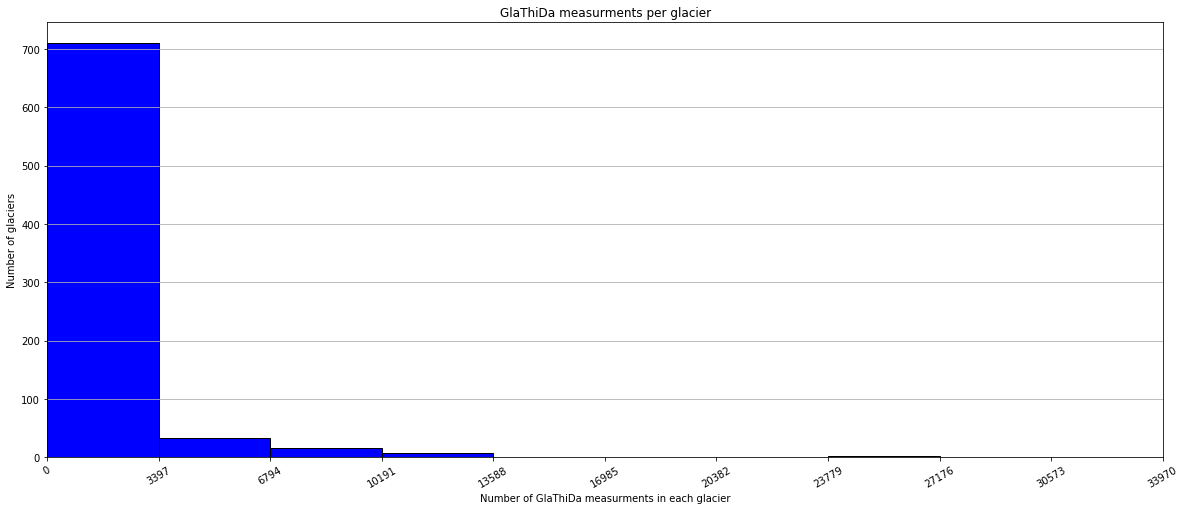

In [5]:
# Histogram of points per glacier
bins = 10
plt.figure(figsize=(20,8))
pts.plot.hist(bins=bins, color='b', edgecolor='black')
plt.xticks(range(0,int(pts.max())+1,int(pts.max()/bins)), rotation = 30)
plt.xlim(0, pts.max())
plt.title('GlaThiDa measurments per glacier')
plt.ylabel('Number of glaciers')
plt.xlabel('Number of GlaThiDa measurments in each glacier')
plt.grid(axis='y');

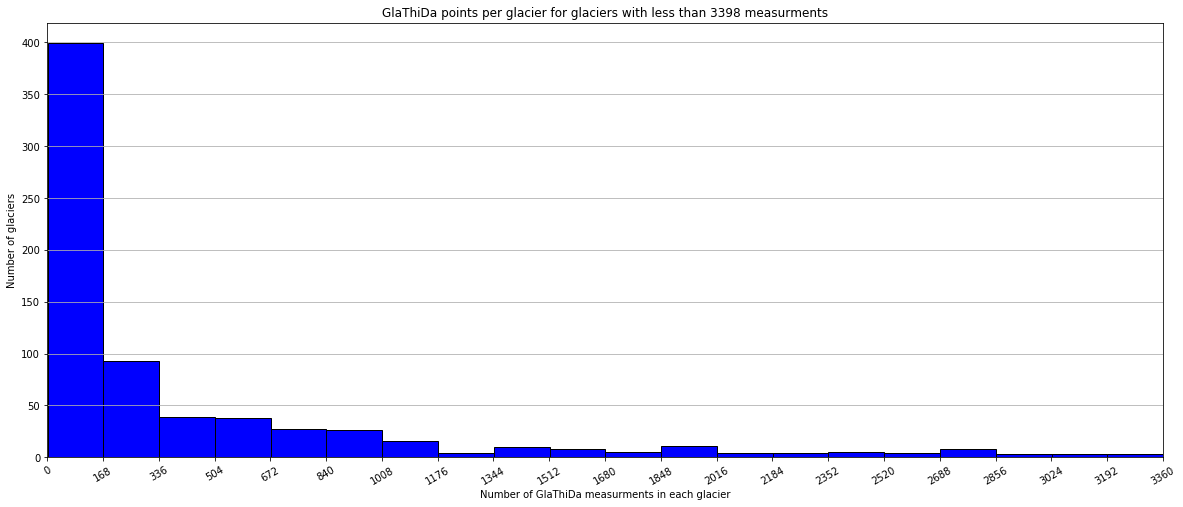

In [6]:
# Histogram of points per glacier
low = 3398
pts_l = pts[pts<low]
bins = 20
plt.figure(figsize=(20,8))
pts_l.plot.hist(bins=bins, color='b', edgecolor='black')
plt.xticks(range(0,int(pts_l.max())+1,int(pts_l.max()/bins)), rotation = 30)
plt.xlim(0, pts_l.max())
plt.title('GlaThiDa points per glacier for glaciers with less than {} measurments'.format(low))
plt.ylabel('Number of glaciers')
plt.xlabel('Number of GlaThiDa measurments in each glacier')
plt.grid(axis='y');

In [7]:
# number of glaciers with more and less than n points
n = 20
few_pts = (pts[pts<n]).count()/n_glaciers*100
printmd('#### Percentage of glaciers with less than {0} measurments: {1:.2f} %'.format(n, few_pts))

#### Percentage of glaciers with less than 20 measurments: 14.53 %

### Examples of Glaciers and points distribution

In [8]:
# pick an EVEN NUMBER of glaciers with diffeent amount of GlaThidDa points 
glaciers = {30: 'RGI60-11.00110', 100: 'RGI60-11.00311', 5000: 'RGI60-11.00638', 25000: 'RGI60-11.02773'}

In [9]:
# load the respective regions:
region_paths = []
# find all regions files
for n, glac in glaciers.items():
    reg_num = glac.split('-')[1][0:2]
    string = r'~\{0}**\*.shp'.format(reg_num)
    region_paths.append(glob.glob(string)[0])
region_paths = np.array(region_paths)
rgs = []
# load only uique regions and store them in a list of geodataframes
for region in np.unique(region_paths):
    rgs.append(gpd.read_file(region))

In [10]:
# create list of glaciers fom the glaciers you chose
rgiid = []
rxs = []
rys = []
for n, glac in glaciers.items():
    for rg in rgs:
        rgi_glac = rg[rg['RGIId']==glac]
        if not rgi_glac.empty:
            rgiid.append(rgi_glac)
            # assign exterior of the polygon to rx, ry in order to be processed by matplotlib 
            rxs.append(rgi_glac['geometry'].iloc[0].exterior.xy[0])
            rys.append(rgi_glac['geometry'].iloc[0].exterior.xy[1])

In [11]:
pxs = []
pys = []
thicknesses = []
for n, glac in glaciers.items():
    glacier = gdf[gdf['RGIId']==glac]
    pxs.append(glacier['geometry'].x)
    pys.append(glacier['geometry'].y)
    thicknesses.append(glacier['THICKNESS'])

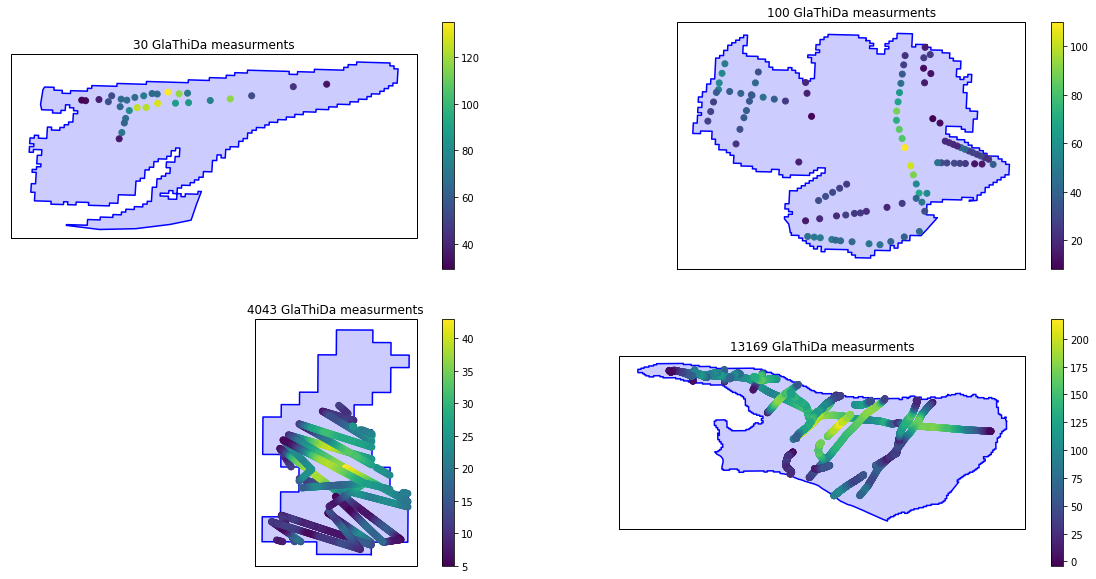

In [12]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(int(len(rxs)/2),2, figsize = (20,10), subplot_kw=dict(projection=proj))
i = 0 
for ax in axs.reshape(axs.size):
    if i<len(rxs):
        ax.plot(rxs[i], rys[i], c='b')
        ax.fill(rxs[i], rys[i], alpha=0.2, fc='b', ec='none')
        ax.set_title('{} GlaThiDa measurments'.format(len(thicknesses[i])))
        sc = ax.scatter(pxs[i],pys[i], c=thicknesses[i], zorder=10)
        plt.colorbar(sc, ax = ax)
        i += 1

### Spacial Distribution of the chosen glaciers

In [13]:
# points with a glacier assigned
plt.figure(figsize=(1,10))
i = 0
for ax in axs.reshape(4):
    plt.plot(rxs[i], rys[i], c='r')
    plt.fill(rxs[i], rys[i], alpha=0.2, fc='r', ec='none')
    i += 1
mplleaflet.display(crs=rgs[0].crs)